In [2]:

# Ignorar warnings

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")

In [3]:
%pip install imblearn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math

from plotly.subplots import make_subplots

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_squared_error,  mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from itertools import product

%matplotlib inline

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedWriter name=3>
  del self._target, self._args, self._kwargs
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedReader name=4>
  del self._target, self._args, self._kwargs
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.12_3.12.1008.0_x64__qbz5n2kfra8p0\Lib\threading.py:1014: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  del self._target, self._args, self._kwargs


El conjunto de datos contiene 36733 instancias de 11 medidas de sensores agregadas durante una hora (mediante promedio o suma) de una turbina de gas ubicada en la región noroeste de Turquía con el fin de estudiar las emisiones de gases de combustión, a saber, CO y NOx (NO + NO2). Los datos provienen de la misma planta de energía que el conjunto de datos (http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant) utilizado para predecir el rendimiento energético neto por hora. Por el contrario, estos datos se recopilan en otro rango de datos (01.01.2011 - 31.12.2015), incluye parámetros de la turbina de gas (como la temperatura de entrada de la turbina y la presión de descarga del compresor) además de las variables ambientales. Tenga en cuenta que las fechas no se dan en las instancias pero los datos están ordenados en orden cronológico. Consulte la información del atributo y el documento relevante para obtener más detalles. Siga amablemente el protocolo mencionado en el documento (utilizando los datos de los primeros tres años para capacitación/validación cruzada y los dos últimos para pruebas) para la reproducibilidad y comparabilidad de los trabajos. El conjunto de datos se puede utilizar bien para predecir el rendimiento energético de la turbina (TEY) utilizando variables ambientales como características.

Las explicaciones de las mediciones de los sensores y sus breves estadísticas se dan a continuación. Variable (Abrev.) Unidad Mín. Máx. Media Temperatura ambiente (AT) C –6,23 37,10 17,71 Presión ambiente (AP) mbar 985,85 1036,56 1013,07 Humedad ambiente (AH) (%) 24,08 100,20 77,87 Diferencia de presión del filtro de aire (AFDP) mbar 2,09 7,61 3,93 Presión de escape de la turbina de gas (GTEP) mbar 17,70 40,72 25,56 Temperatura de entrada de la turbina (TIT) C 1000,85 1100,89 1081,43 Temperatura posterior de la turbina (TAT) C 511,04 550,61 546,16 Presión de descarga del compresor (CDP) mbar 9,85 6 12.06 Rendimiento energético de la turbina (TEY) MWH 100,02 179,50 133,51 Monóxido de carbono (CO) mg/m3 0,00 44,10 2,37 Óxidos de nitrógeno (NOx) mg/m3 25,90 119,91 65,29

In [5]:
# Lectura de archivo csv
df_1 = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/gt_2011.csv", sep=",")
df_2 = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/gt_2012.csv", sep=",")
df_3 = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/gt_2013.csv", sep=",")
df_4 = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/gt_2014.csv", sep=",")
df_5 = pd.read_csv("https://raw.githubusercontent.com/Leostark95/Analitica_2_Proyecto_3/main/gt_2015.csv", sep=",")

Es importante destacar que el trabajo consta de 5 bases de datos, se paradas por años, con los datos de las turbinas de gas

In [6]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5], axis=0, ignore_index=True)

Aquí procedimos a concatenar las bases de datos para trabajar con todo el conjunto de datos.

In [7]:
# orden de las colunmas
column_order = ['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX', 'TEY']
df = df[column_order]

Definición variables:  

AT= Temperatura ambiente
AP=Presión ambiente
AH= Humedad ambiente
AFDP= Diferencia de presión del filtro de aire
GTEP=Presión de escape de la turbina de gas
TIT= Temperatura de entrada de la turbina
TAT= Temperatura posterior de la turbina 
CDP=Presión de descarga del compresor
CO=Monóxido de carbono
NOX=Óxidos de nitrógeno 
TEY=Rendimiento energético de la turbina (Variable objetivo)

En este trabajo tenemos como variable objetivo "TEY" que es el rendimiento energético de la turbina, por lo que decidimos ubicarla al final del dataframe.

In [8]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  11.462   

             CO      NOX     TEY  
0       0.32663   81.952  134.67  
1       0.44784   82.377  134.67  
2       0.45144   83.776  135.10  
3       0.23107   82.505  135.03  
4       0.26747   82.028  134.67  
...         ...      ...     ...  
36728  10.99300   89.172  109.08  
36729  11.14400   88.849  108.79  
36730  11.41400   96.147  107.81  
36731   3.31340   64.738  131.41  
36732  11.98100  109.240  125.41  

[36733 rows x 11 columns]

Aqui visualizamos el dataframe completo que consta de 36733 registros y 11 columnas.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36733 entries, 0 to 36732
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   CDP     36733 non-null  float64
 8   CO      36733 non-null  float64
 9   NOX     36733 non-null  float64
 10  TEY     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.1 MB


De estos resultados podríamos destacar que todas las columnas contienen datos numéricos (float64), lo que sugiere que este conjunto de datos puede estar relacionado con mediciones o registros cuantitativos, no hay valores nulos, según la descripción, todas las columnas tienen una cantidad no nula de entradas, lo que indica que no hay valores faltantes en el conjunto de datos.

In [10]:
df.describe()

AT            AP            AH          AFDP          GTEP  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean      17.712726   1013.070165     77.867015      3.925518     25.563801   
std        7.447451      6.463346     14.461355      0.773936      4.195957   
min       -6.234800    985.850000     24.085000      2.087400     17.698000   
25%       11.781000   1008.800000     68.188000      3.355600     23.129000   
50%       17.801000   1012.600000     80.470000      3.937700     25.104000   
75%       23.665000   1017.000000     89.376000      4.376900     29.061000   
max       37.103000   1036.600000    100.200000      7.610600     40.716000   

                TIT           TAT           CDP            CO           NOX  \
count  36733.000000  36733.000000  36733.000000  36733.000000  36733.000000   
mean    1081.428084    546.158517     12.060525      2.372468     65.293067   
std       17.536373      6.842360      1.088795      2.262672     11.678357   
min     1000.800000    511.040000      9.851800      0.000388     25.905000   
25%     1071.800000    544.720000     11.435000      1.182400     57.162000   
50%     1085.900000    549.880000     11.965000      1.713500     63.849000   
75%     1097.000000    550.040000     12.855000      2.842900     71.548000   
max     1100.900000    550.610000     15.159000     44.103000    119.910000   

                TEY  
count  36733.000000  
mean     133.506404  
std       15.618634  
min      100.020000  
25%      124.450000  
50%      133.730000  
75%      144.080000  
max      179.500000

Rango de valores: Se proporcionan los valores mínimos y máximos para cada variable. Por ejemplo, la temperatura ambiente (AT) varía desde -6.2348 hasta 37.103 grados Celsius.

Promedio y Desviación Estándar: Se proporcionan la media y la desviación estándar para cada variable, lo que nos da una idea de la tendencia central y la dispersión de los datos. Por ejemplo, la media de la temperatura ambiente (AT) es de aproximadamente 17.71 grados Celsius, con una desviación estándar de aproximadamente 7.45 grados Celsius.

Percentiles: Los percentiles 25%, 50% (mediana) y 75% se proporcionan para cada variable, lo que nos da una idea de la distribución de los datos y la dispersión en torno a la mediana. Por ejemplo, la mediana de la temperatura ambiente (AT) es de aproximadamente 17.801 grados Celsius.

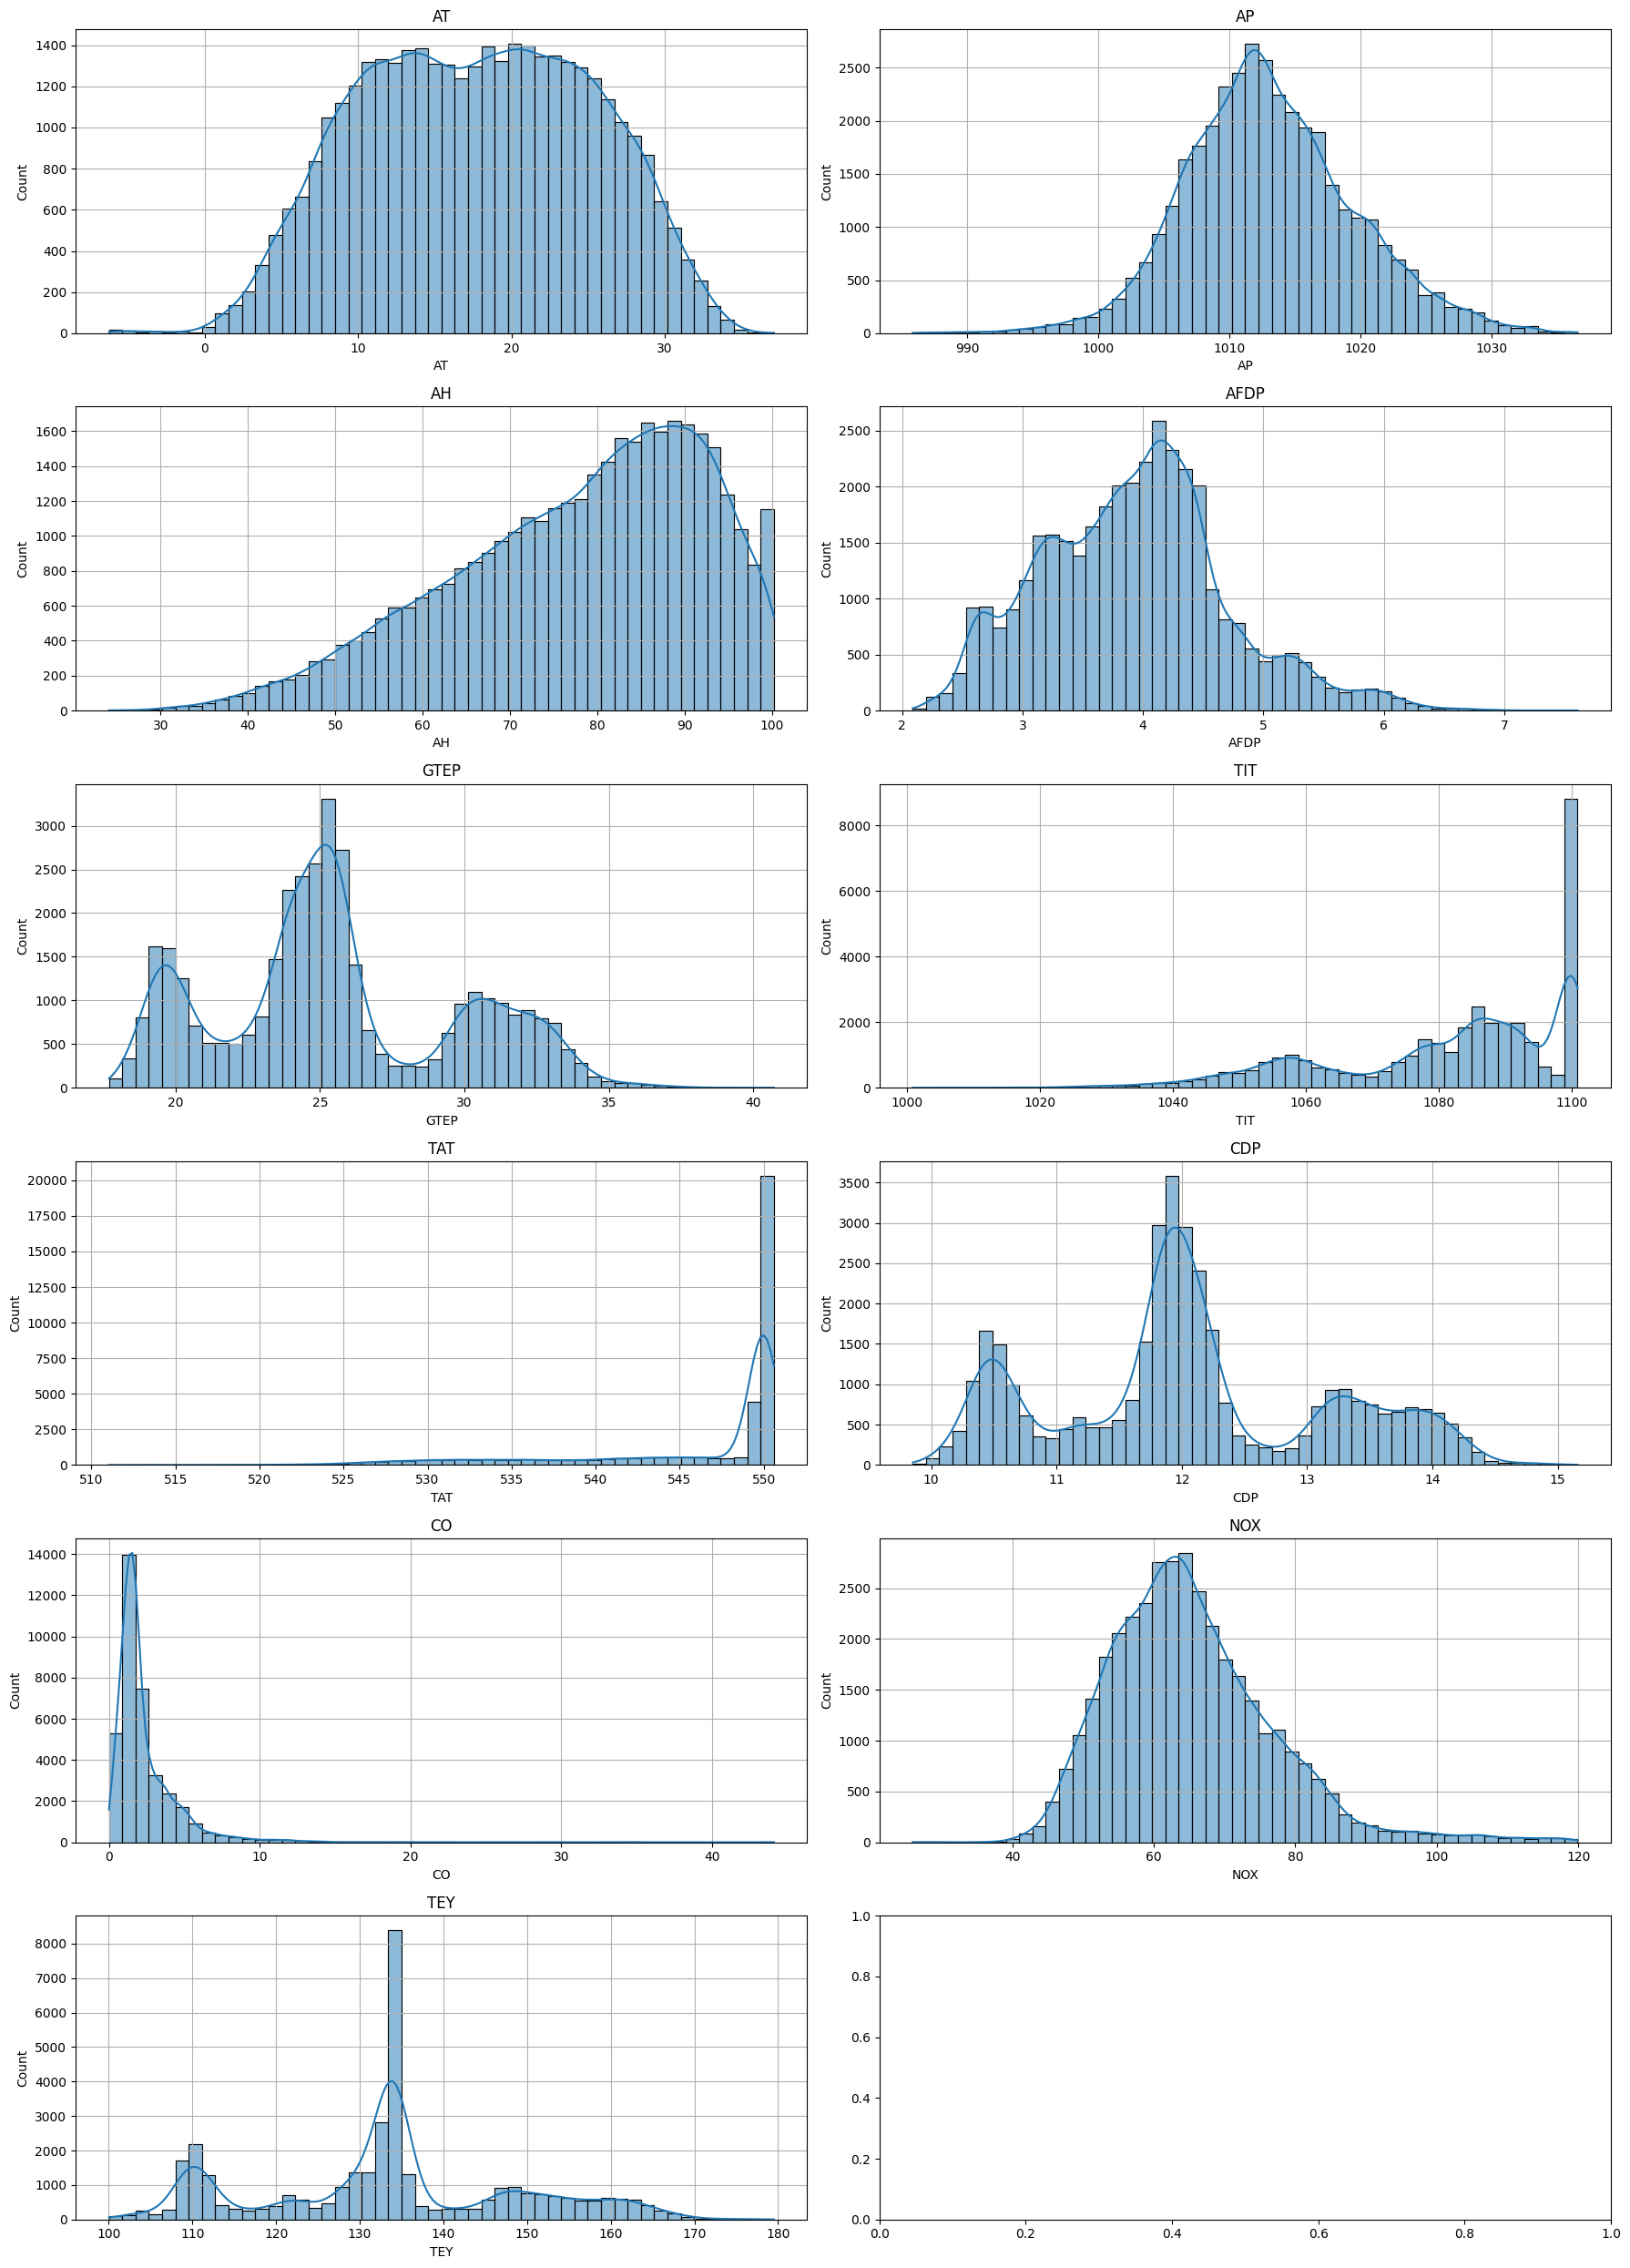

In [11]:
# Histograma de variables

num_filas = 6  # Aumenta el número de filas
num_columnas = 2

# Crear la matriz de subgráficos
fig, axs = plt.subplots(num_filas, num_columnas, figsize=(18, 25))

# Iterar sobre las variables numéricas y graficar histogramas en los subgráficos
for i, variable in enumerate(df):
    fila = i // num_columnas
    columna = i % num_columnas
    sns.histplot(df[variable], bins=50, kde=True, ax=axs[fila, columna])
    axs[fila, columna].set_title(variable)
    axs[fila, columna].grid(True)  # Agregar una grilla

# Ajustar el espacio entre subgráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Distribuciones Variadas: Cada histograma muestra una forma y dispersión distintas, lo que sugiere diferentes tipos de distribución y varianza en los conjuntos de datos.

Modos de Distribución: Algunos histogramas muestran una distribución unimodal con un pico claro, mientras que otros son bimodales con dos picos o tienen una distribución más uniforme.



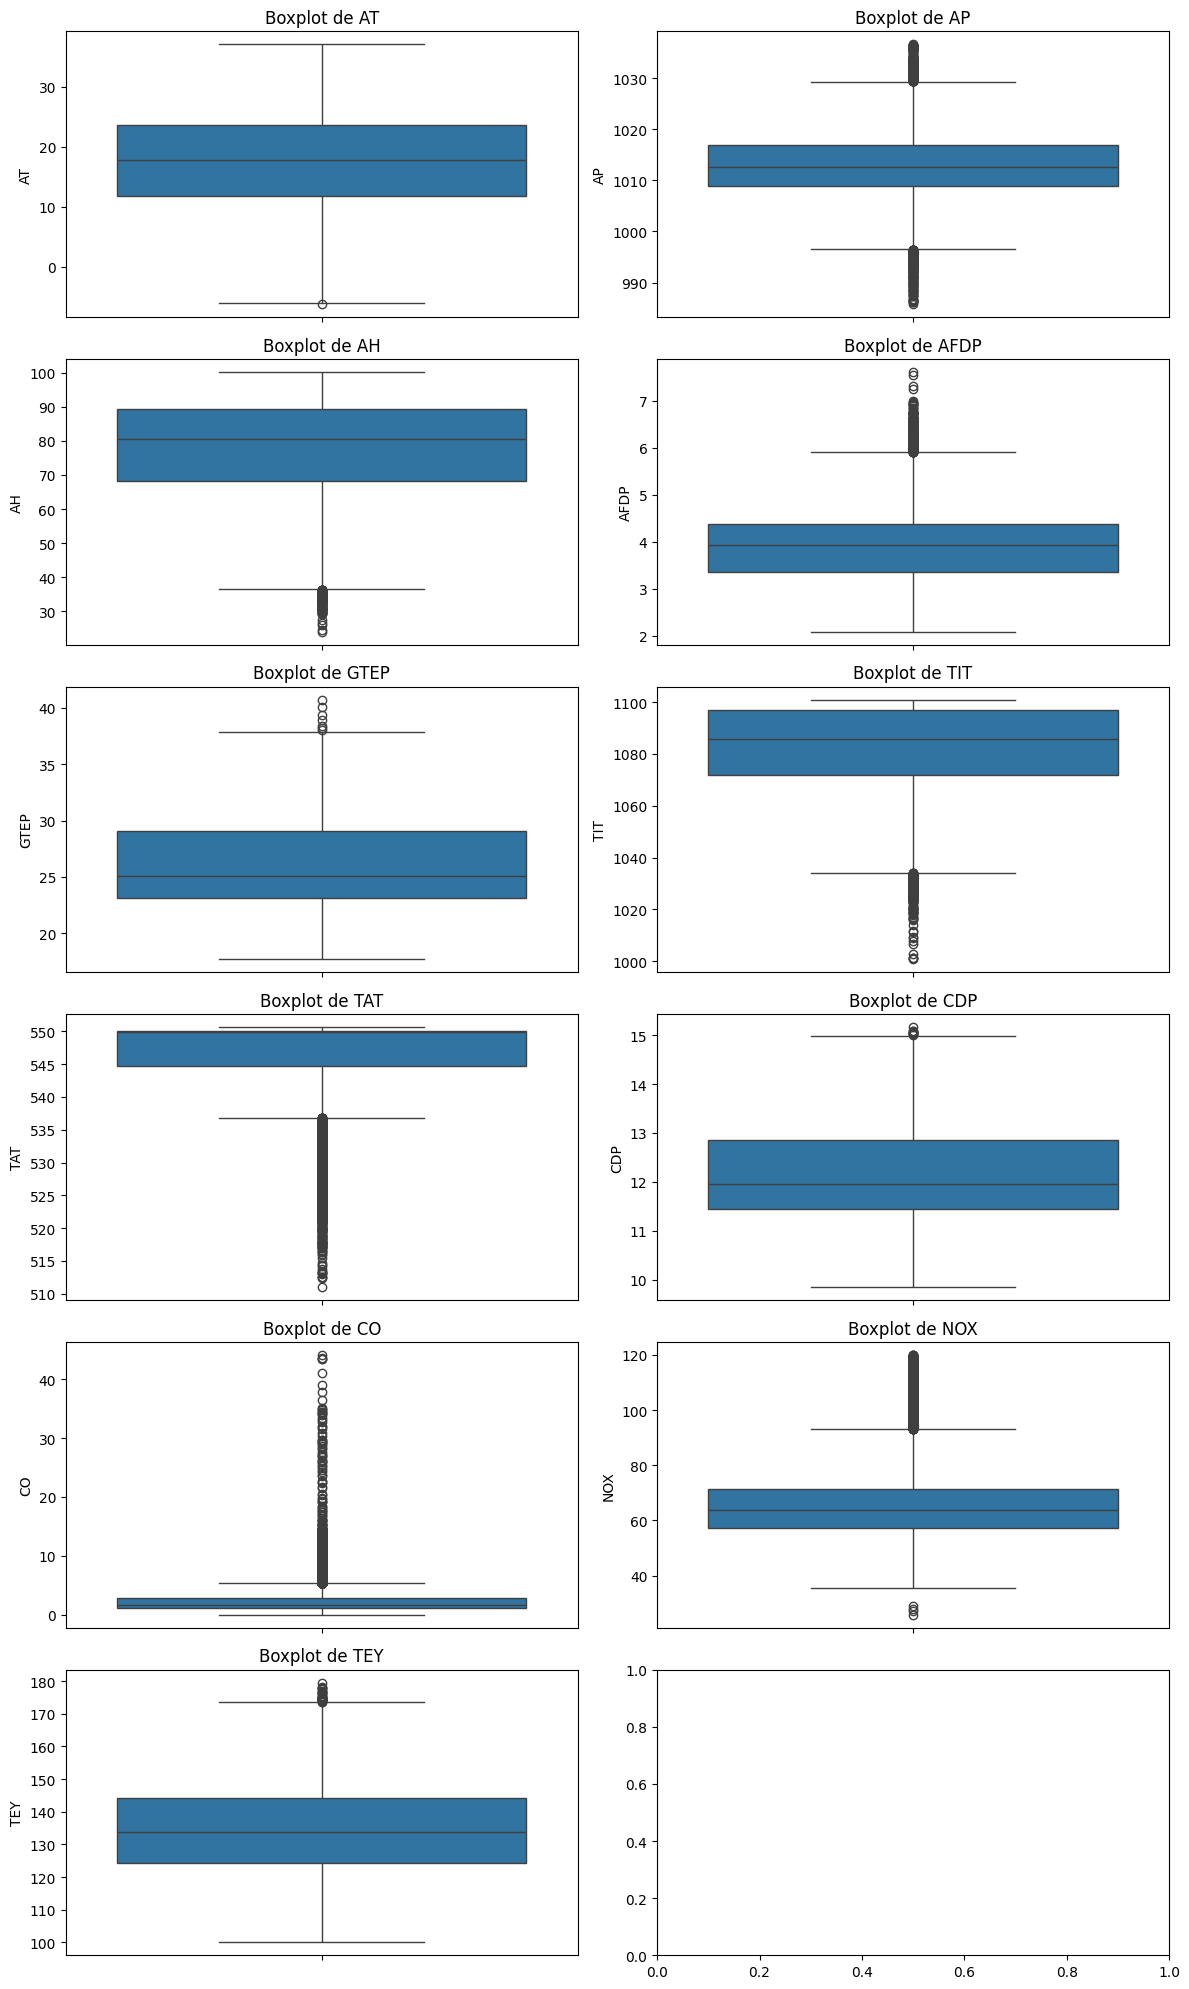

In [12]:
# Boxplot para variables numéricas

fig, axs = plt.subplots(6, 2, figsize=(12, 20))

for i, variable in enumerate(df):
    fila = i // 2
    columna = i % 2
    
    sns.boxplot(y=df[variable], ax=axs[fila, columna])
    axs[fila, columna].set_title(f'Boxplot de {variable}')

colores_pastel = sns.color_palette('rainbow')
plt.tight_layout()
plt.show()

Las variables tienen rangos y distribuciones variadas. Por ejemplo, AP y TAT tienen valores atípicos en ambos extremos, mientras que AH y CO muestran muchos valores atípicos en el extremo inferior.

La variable objetivo TEY muestra algunos valores atípicos en el extremo superior. Esto podría afectar el modelado y debe ser considerado.

El boxplot de AT presenta una distribuciòn normal.

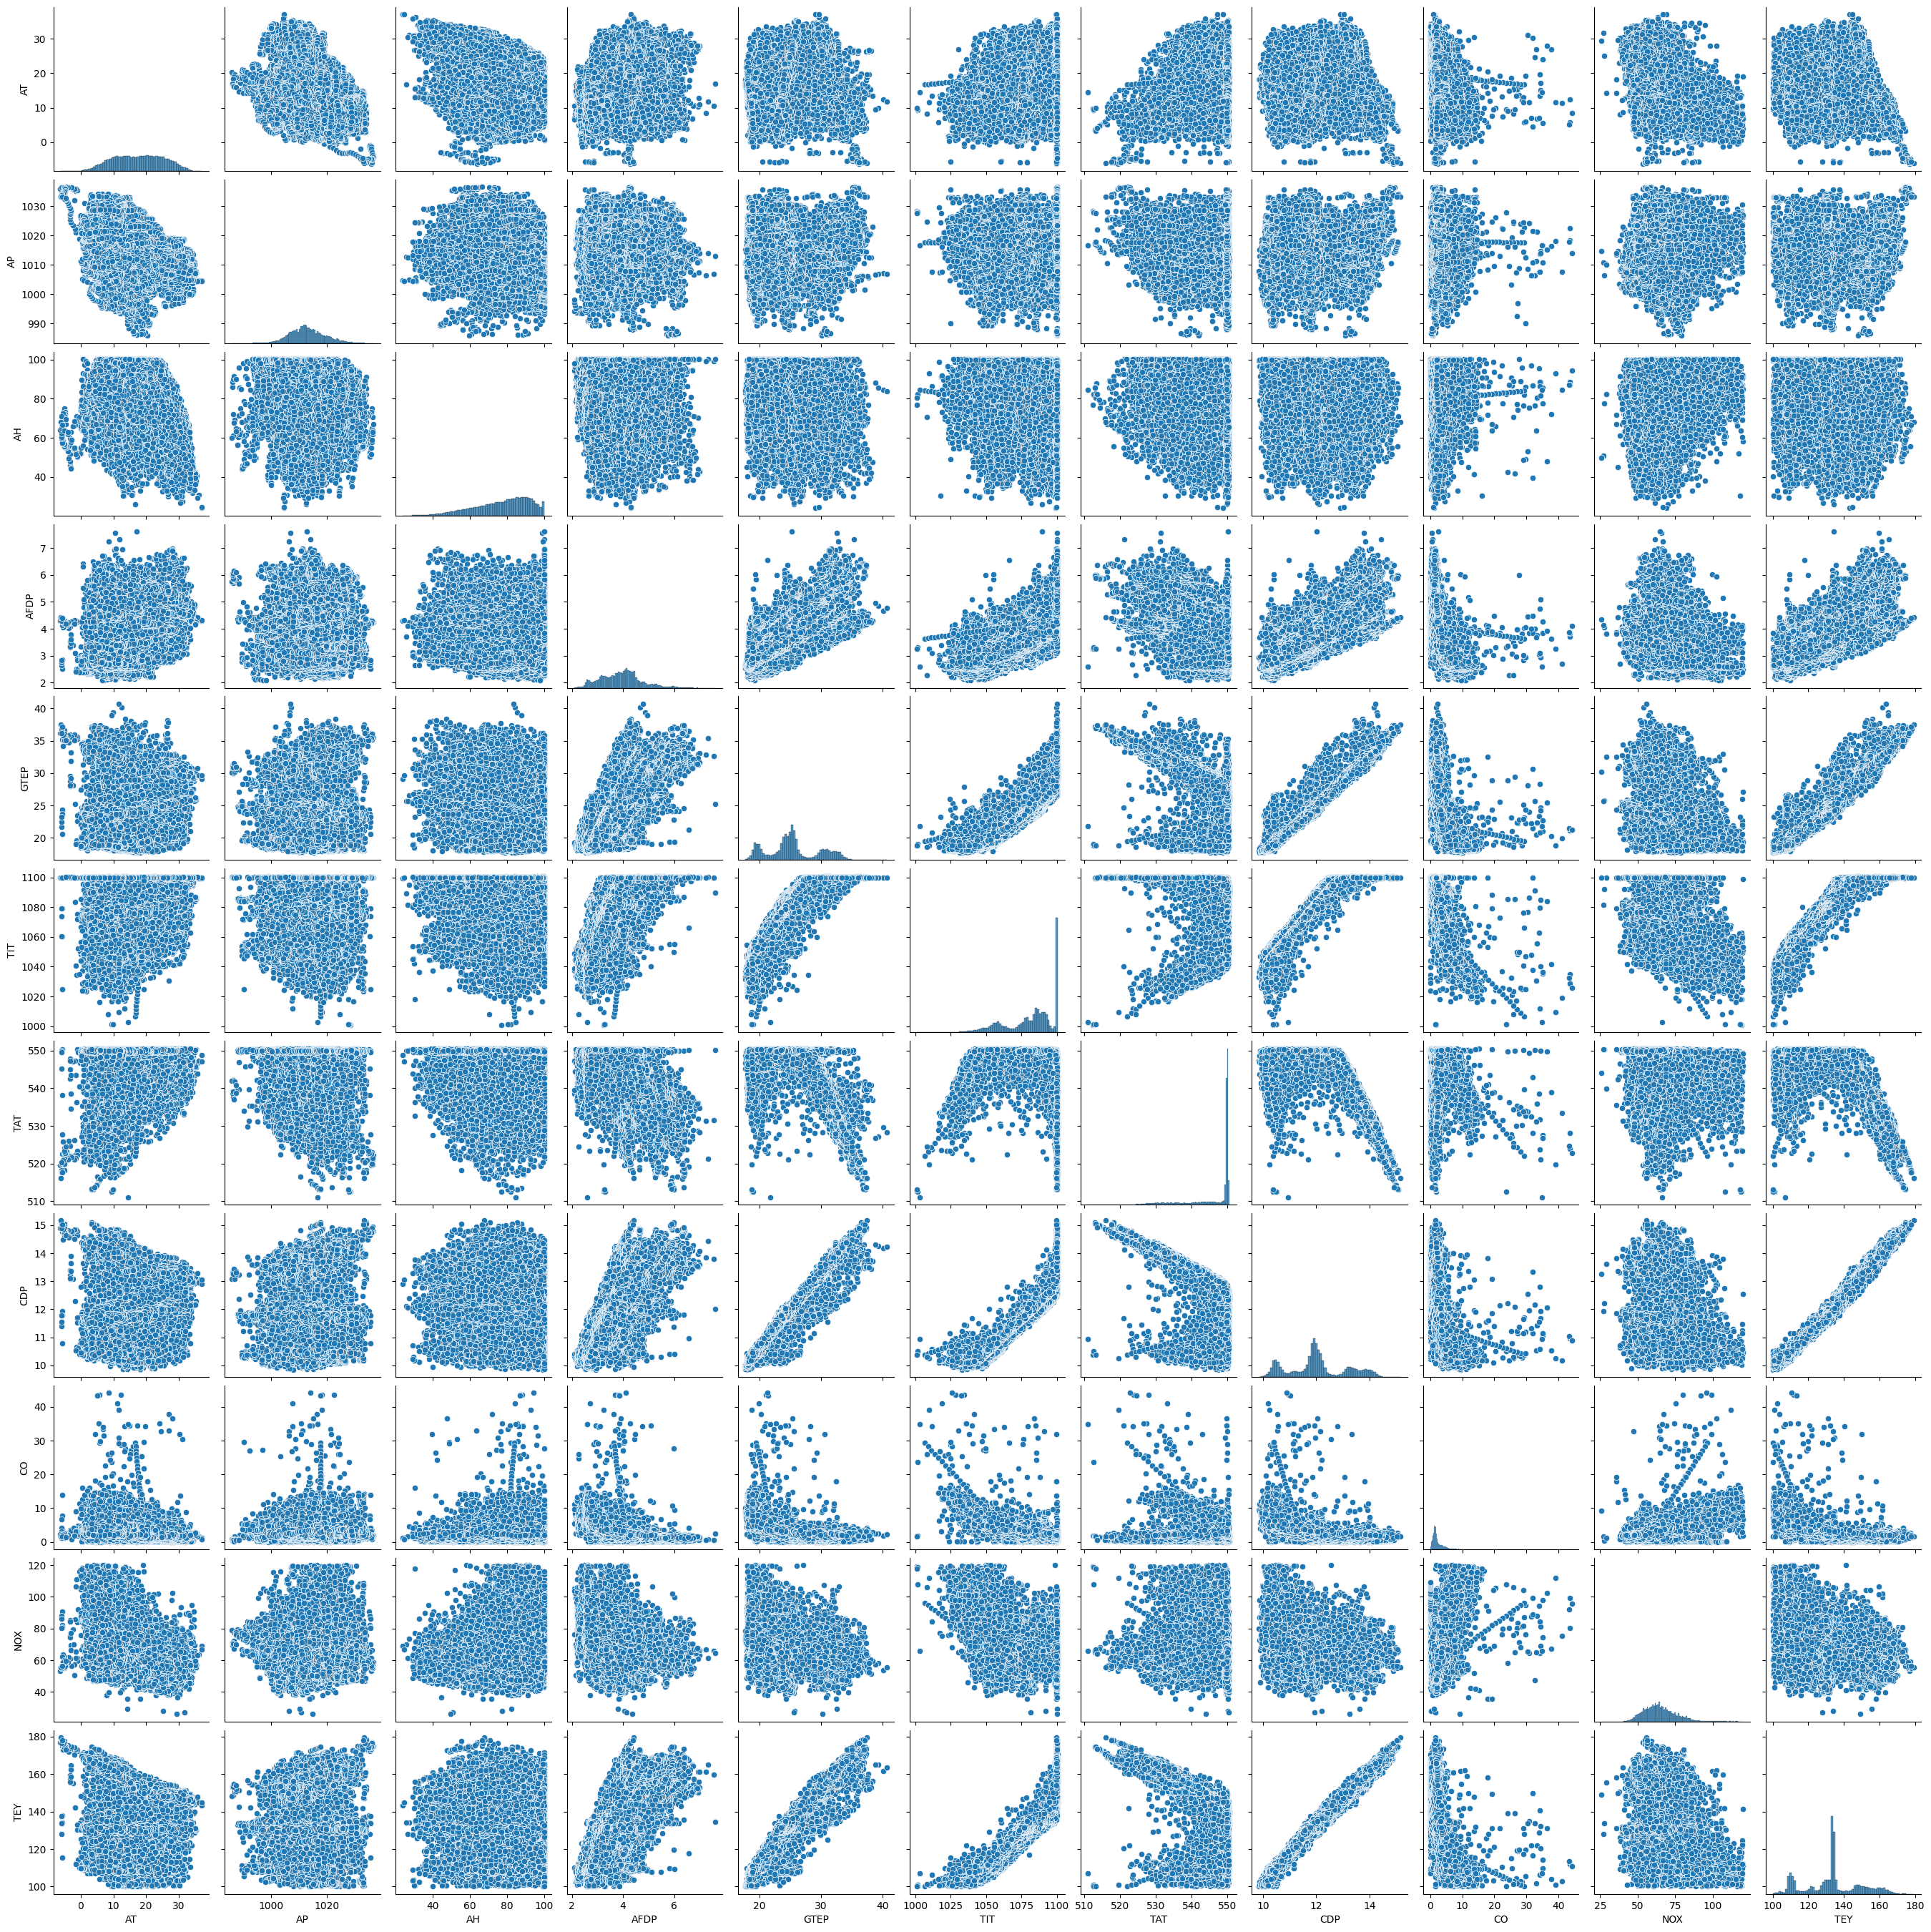

In [13]:
# diagrama de dispersión entre variables numéricas
df
sns.pairplot(df)
plt.show()

Algunos diagramas no presentan mucha relacion, pero por ejemplo, las variables, CDP, TIT, Y GTEP presentan mayor relacion con la variable objetivo, aunque se evidencian otras co-relaciones que analizaremos mejor en la matriz de correlaciòn.

In [14]:
# Matriz de Correlación
corrmat = df.corr()
corrmat

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.406601 -0.476291  0.251974  0.045851  0.183706  0.281869   
AP   -0.406601  1.000000 -0.015184 -0.040363  0.057533 -0.005390 -0.225601   
AH   -0.476291 -0.015184  1.000000 -0.147840 -0.235153 -0.221809  0.022965   
AFDP  0.251974 -0.040363 -0.147840  1.000000  0.678485  0.691292 -0.466882   
GTEP  0.045851  0.057533 -0.235153  0.678485  1.000000  0.874234 -0.699703   
TIT   0.183706 -0.005390 -0.221809  0.691292  0.874234  1.000000 -0.380862   
TAT   0.281869 -0.225601  0.022965 -0.466882 -0.699703 -0.380862  1.000000   
CDP   0.015287  0.102636 -0.196275  0.702568  0.978470  0.908469 -0.706438   
CO   -0.174326  0.067050  0.106586 -0.448425 -0.518909 -0.706275  0.058353   
NOX  -0.558174  0.191938  0.164617 -0.188247 -0.201630 -0.213865 -0.092791   
TEY  -0.091152  0.118224 -0.137360  0.665483  0.964127  0.910297 -0.682396   

           CDP        CO       NOX       TEY  
AT    0.015287 -0.174326 -0.558174 -0.091152  
AP    0.102636  0.067050  0.191938  0.118224  
AH   -0.196275  0.106586  0.164617 -0.137360  
AFDP  0.702568 -0.448425 -0.188247  0.665483  
GTEP  0.978470 -0.518909 -0.201630  0.964127  
TIT   0.908469 -0.706275 -0.213865  0.910297  
TAT  -0.706438  0.058353 -0.092791 -0.682396  
CDP   1.000000 -0.551027 -0.171256  0.988778  
CO   -0.551027  1.000000  0.340606 -0.569813  
NOX  -0.171256  0.340606  1.000000 -0.116127  
TEY   0.988778 -0.569813 -0.116127  1.000000

Con esta matriz evidenciamos ciertas correlaciones, pero para tener màs claridad, las analizaremos con una matriz de correlaciòn y mapa de calor.

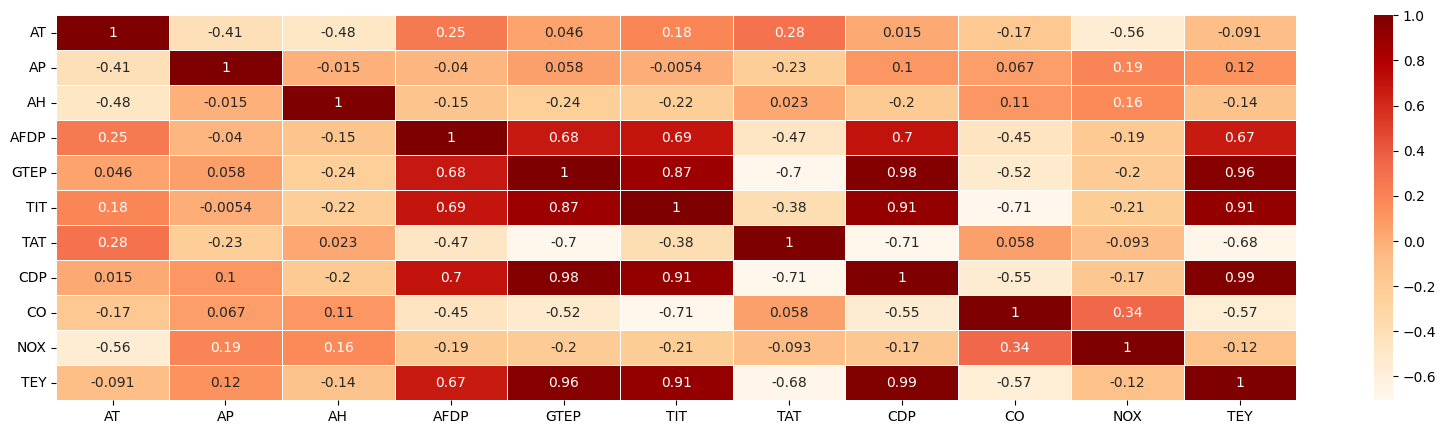

In [15]:
# Heat Map
f, ax = plt.subplots(figsize = (20, 5))
sns.heatmap(corrmat, annot = True,  cmap ='OrRd', linewidths=.5)
plt.show()

En esta matriz corroboramos la correlaciòn entre la variable objetivo y las variables de GTEP, TIT, CDP principalmente, tambièn evidenciamos multicolinealidad.

# Pre-procesamiento de datos

In [16]:
# Comprobación de valores duplicados
df.duplicated().sum()

7

In [17]:
# Eliminación de valores duplicados
df = df.drop_duplicates()

# Comprobación de valores duplicados
df.duplicated().sum()

0

In [18]:
# Valores faltantes
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
CDP     0
CO      0
NOX     0
TEY     0
dtype: int64

Comprobamos que la base de datos no tenga datos faltantes, para poder continuar con el procesado.

In [19]:
# Contar los ceros
for variable in df:
    num_zeros = (df[variable] == 0).sum()
    print(f"Número de ceros en la variable '{variable}': {num_zeros}")

Número de ceros en la variable 'AT': 0
Número de ceros en la variable 'AP': 0
Número de ceros en la variable 'AH': 0
Número de ceros en la variable 'AFDP': 0
Número de ceros en la variable 'GTEP': 0
Número de ceros en la variable 'TIT': 0
Número de ceros en la variable 'TAT': 0
Número de ceros en la variable 'CDP': 0
Número de ceros en la variable 'CO': 0
Número de ceros en la variable 'NOX': 0
Número de ceros en la variable 'TEY': 0


Evidenciamos la no presencia de numeros ceros en la base de datos lo que nos comprueba la calidad de esta para utilizarla en los pasos siguientes.

In [20]:
df_IQR = df.copy()

# Calcular el rango intercuartil (IQR)
Q1 = df_IQR.quantile(0.25)
Q3 = df_IQR.quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los datos para eliminar los valores atípicos
df_no_outliers = df_IQR[(df_IQR >= lower_bound) & (df_IQR <= upper_bound)]

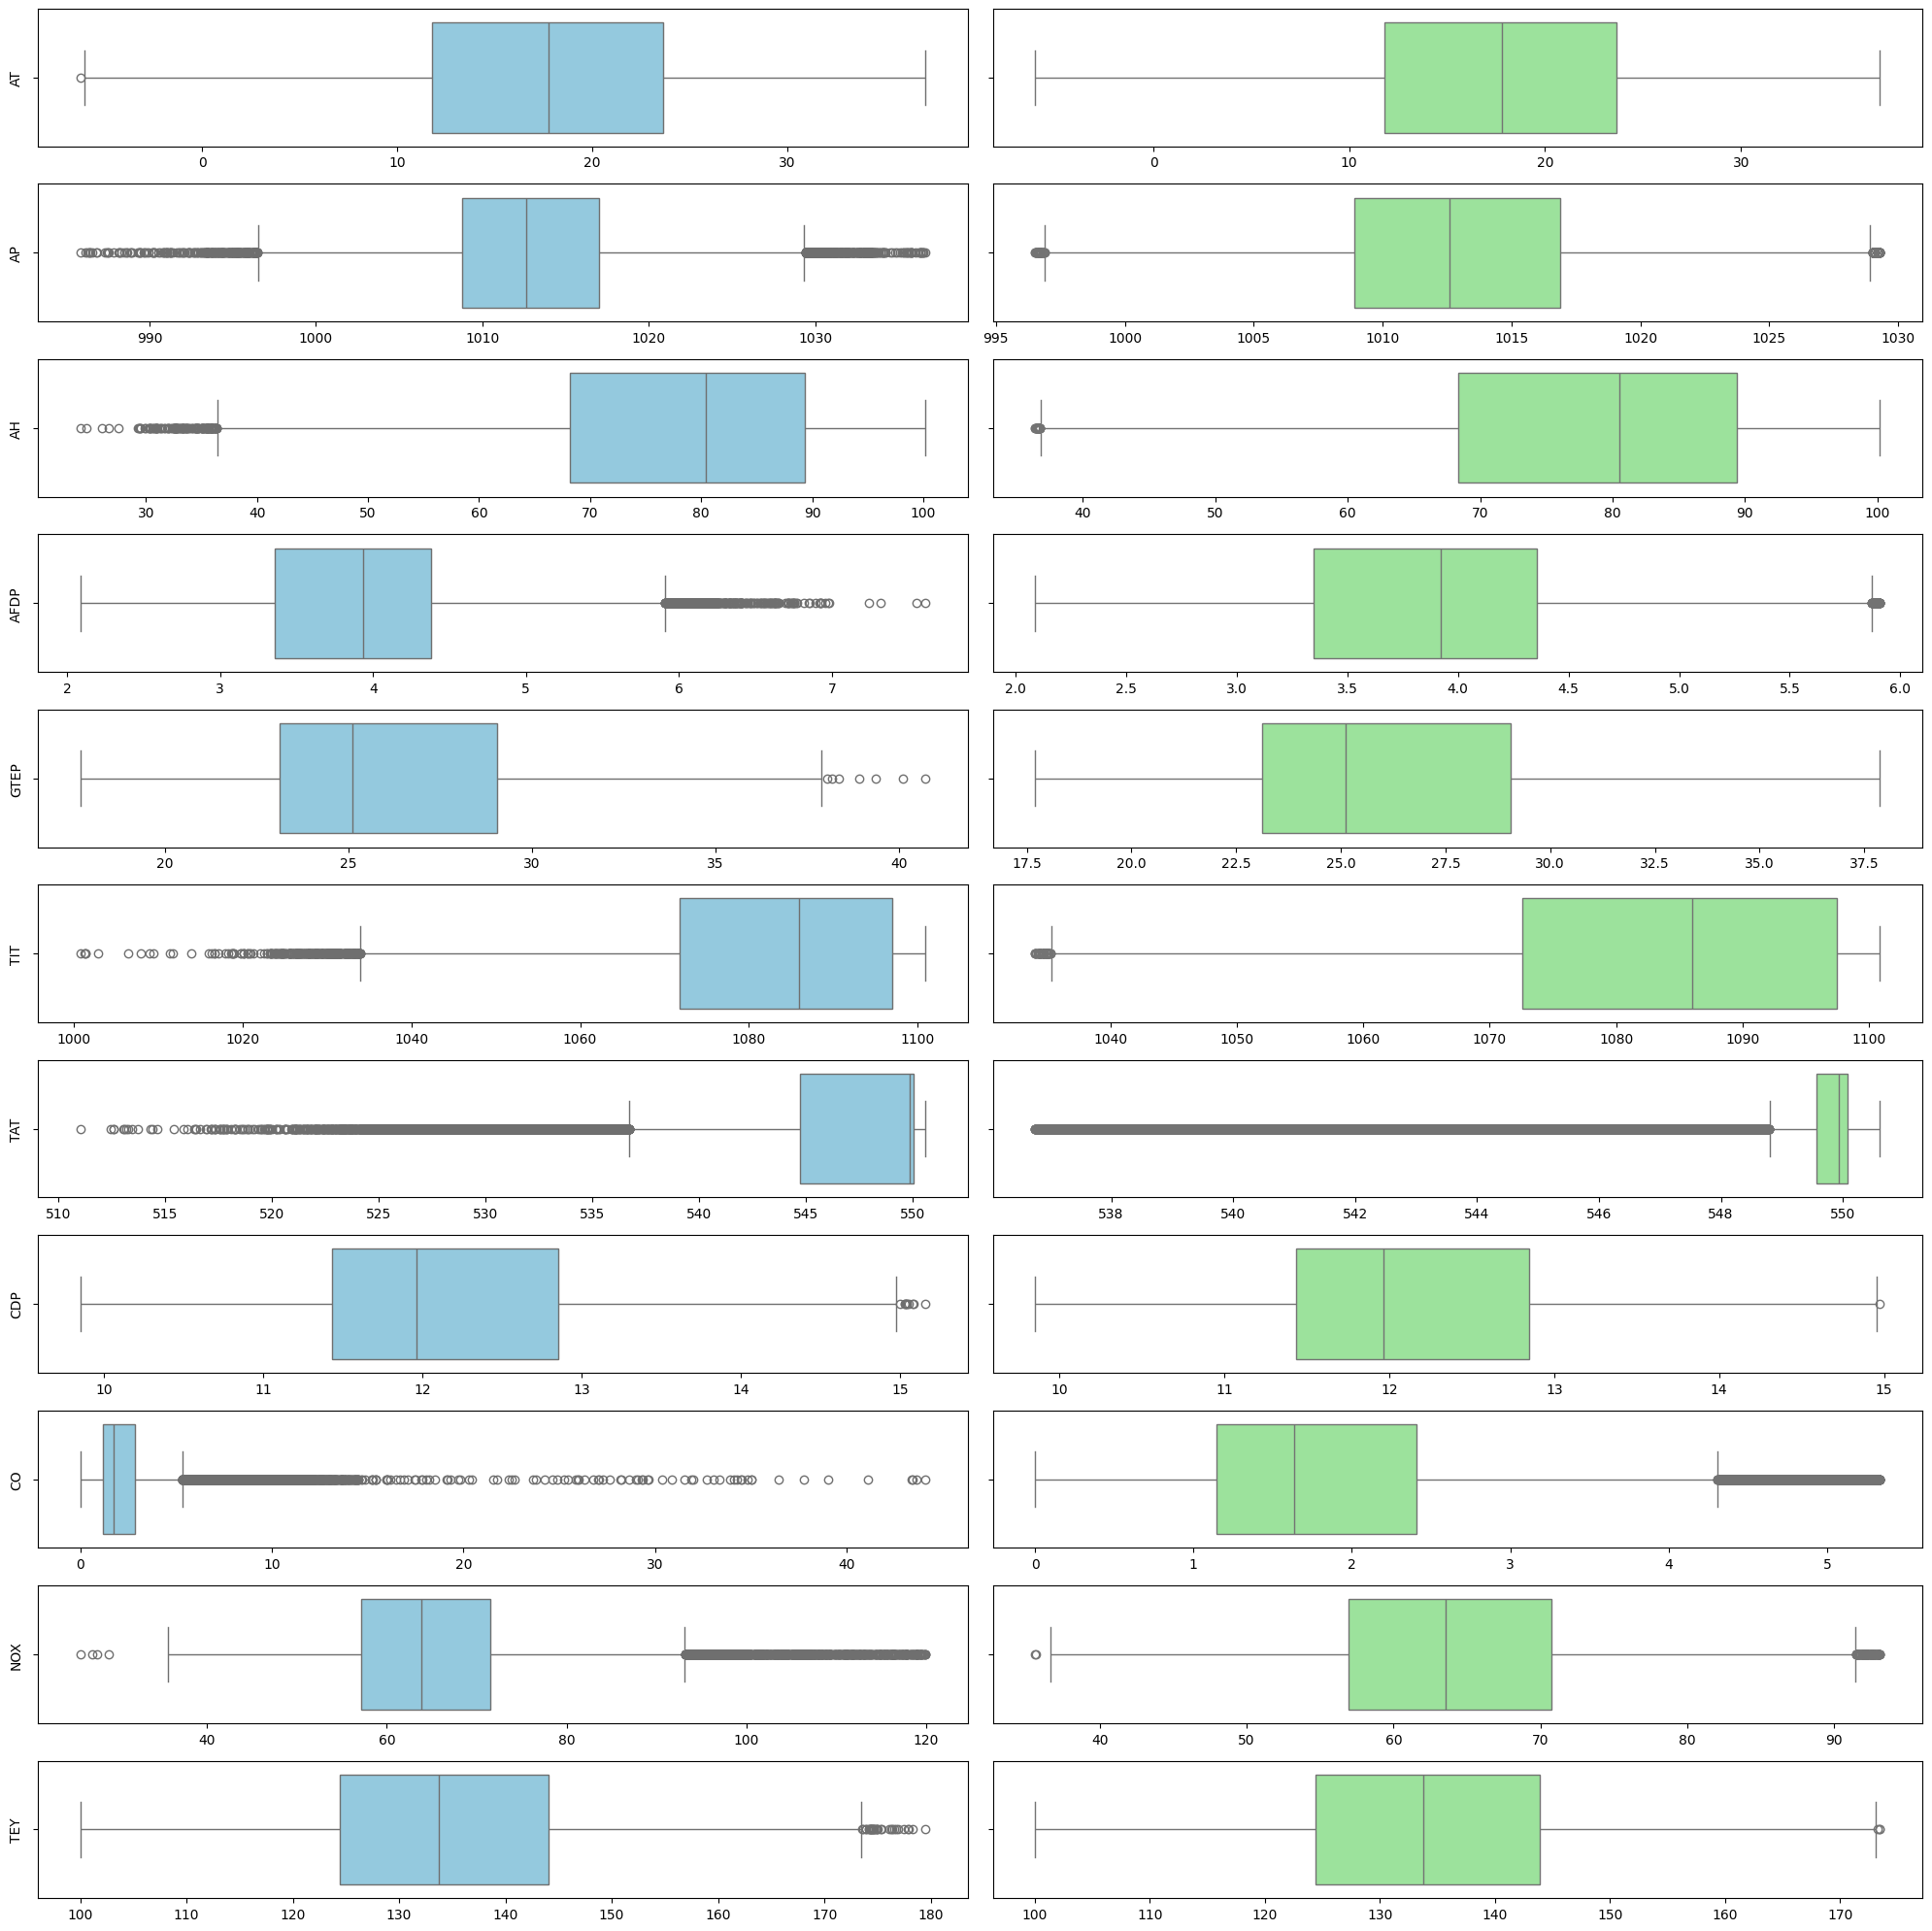

In [21]:
#Comparación de variables winsorizadas

fig, axes = plt.subplots(11, 2, figsize=(20, 20))

for i, variable in enumerate(df):
    sns.boxplot(data= df_IQR, x=variable, ax=axes[i, 0], color='skyblue')
    sns.boxplot(data= df_no_outliers, x=variable, ax=axes[i, 1], color='lightgreen')

    if i < len(df) - 1:
        axes[i, 0].set_xlabel('')
        axes[i, 1].set_xlabel('')
    else:
        axes[i, 0].set_xlabel('Boxplot antes de tratar')
        axes[i, 1].set_xlabel('Boxplot después de tratar')

    axes[i, 0].set_ylabel(variable)
    axes[i, 1].set_ylabel('')

plt.tight_layout()
plt.show()

Comparamos la distribuciòn de los datos con y sin winsorizado, a lo que comprobamos que al winsorizar, los valores extremos se tratan de una buena forma, y mejora evidentemente estos datos extremos.

In [22]:
df = df_no_outliers


In [25]:
df

AT      AP      AH    AFDP    GTEP     TIT     TAT     CDP  \
0      4.5878  1018.7  83.675  3.5758  23.979  1086.2  549.83  11.898   
1      4.2932  1018.3  84.235  3.5709  23.951  1086.1  550.05  11.892   
2      3.9045  1018.4  84.858  3.5828  23.990  1086.5  550.19  12.042   
3      3.7436  1018.3  85.434  3.5808  23.911  1086.5  550.17  11.990   
4      3.7516  1017.8  85.182  3.5781  23.917  1085.9  550.00  11.910   
...       ...     ...     ...     ...     ...     ...     ...     ...   
36728  3.6268  1028.5  93.200  3.1661  19.087  1037.0  541.59  10.411   
36729  4.1674  1028.6  94.036  3.1923  19.016  1037.6  542.28  10.344   
36730  5.4820  1028.5  95.219  3.3128  18.857  1038.0  543.48  10.462   
36731  5.8837  1028.7  94.200  3.9831  23.563  1076.9  550.11  11.771   
36732  6.0392  1028.8  94.547  3.8752  22.524  1067.9  548.23  11.462   

            CO     NOX     TEY  
0      0.32663  81.952  134.67  
1      0.44784  82.377  134.67  
2      0.45144  83.776  135.10  
3      0.23107  82.505  135.03  
4      0.26747  82.028  134.67  
...        ...     ...     ...  
36728      NaN  89.172  109.08  
36729      NaN  88.849  108.79  
36730      NaN     NaN  107.81  
36731  3.31340  64.738  131.41  
36732      NaN     NaN  125.41  

[36726 rows x 11 columns]